<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [7]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



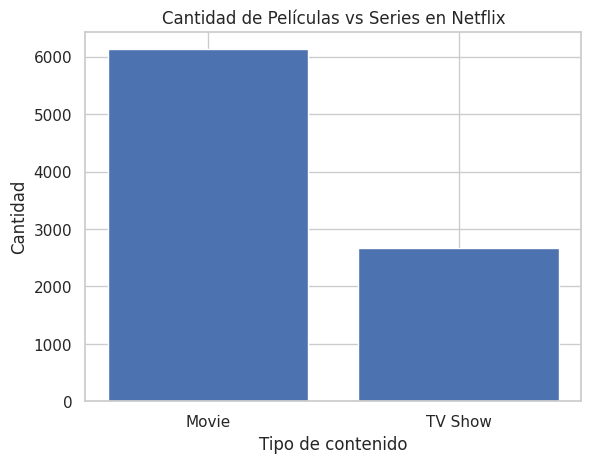

In [13]:
# FIXME 1.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tipo=df["type"].value_counts()
plt.bar(tipo.index, tipo.values)
plt.title("Cantidad de Películas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()


Por lo visto el tipo de contenido preferido en netflix son las peliculas las cuales tienen una clara dominancia por sobre las series

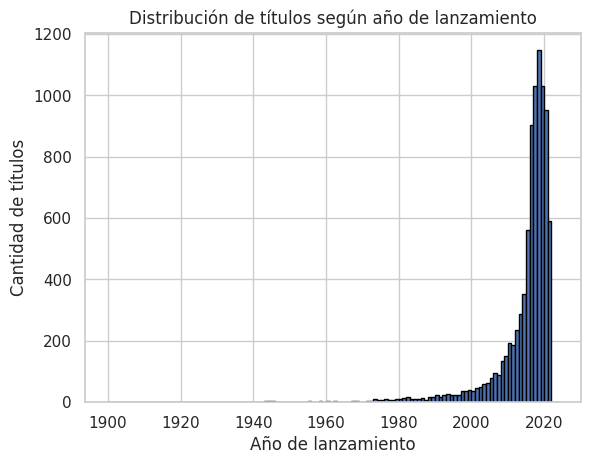

In [21]:
#2.
plt.hist(df["release_year"].dropna(), bins=range(1900,2025,1), edgecolor="black")
plt.title("Distribución de títulos según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()

Claramente se tienen mas peliculas recientes que antiguas, la decada del 2010 al 2020 parece ser donde mas peliculas (que hay en netflix) se lanzaron. Ademas por cada decada desde 1940 se fueron lanzando cada vez mas peliculas, habiendo una baja solo a inicios de 2020 (posiblemente por pandemia)

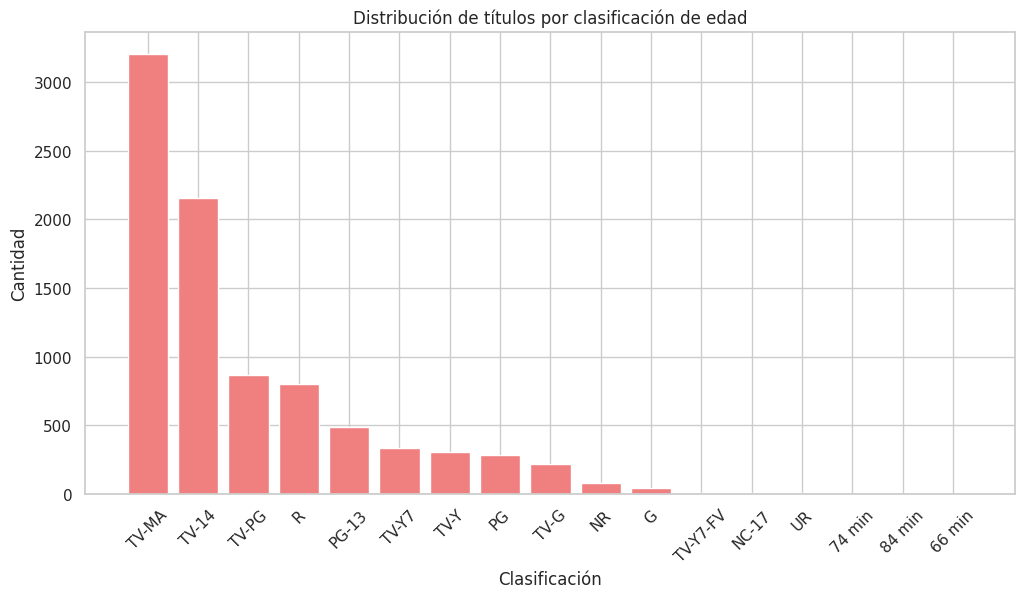

In [22]:
#3.
conteo_rating = df["rating"].value_counts()

plt.bar(conteo_rating.index, conteo_rating.values, color="lightcoral")
plt.title("Distribución de títulos por clasificación de edad")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

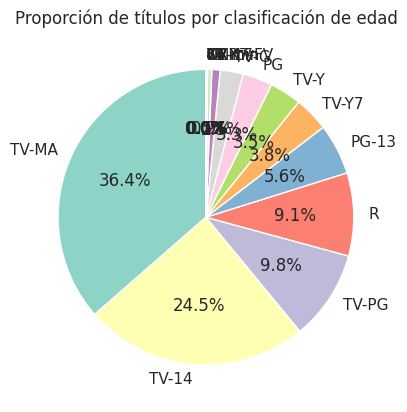

In [23]:
plt.pie(conteo_rating.values,
        labels=conteo_rating.index,
        autopct="%1.1f%%",      # porcentaje con 1 decimal
        startangle=90,
        colors=plt.cm.Set3.colors)  # paleta de colores

plt.title("Proporción de títulos por clasificación de edad")
plt.show()

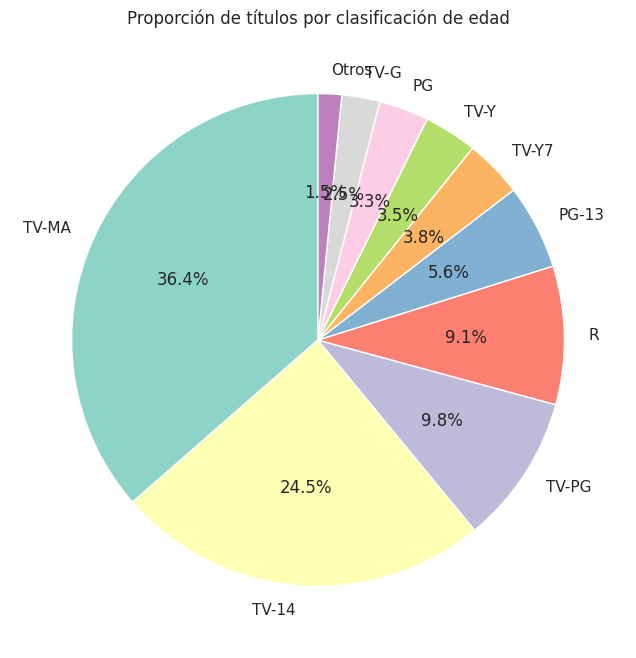

In [24]:
conteo_rating = df["rating"].value_counts(normalize=True) * 100  # en %

mayores = conteo_rating[conteo_rating >= 1]
otros = conteo_rating[conteo_rating < 1].sum()

conteo_final = mayores.copy()
conteo_final["Otros"] = otros

plt.pie(conteo_final.values,
        labels=conteo_final.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Set3.colors)

plt.title("Proporción de títulos por clasificación de edad")
plt.show()

Como se ve mas claramente en el grafico de barras se tiene una preferencia sobretodo para el publico adulto (TV-MA), la cual ademas es la clasificación mas comun, luego esta el publico adolescente (TV-14) y al ultimo menores (TV-PG)



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


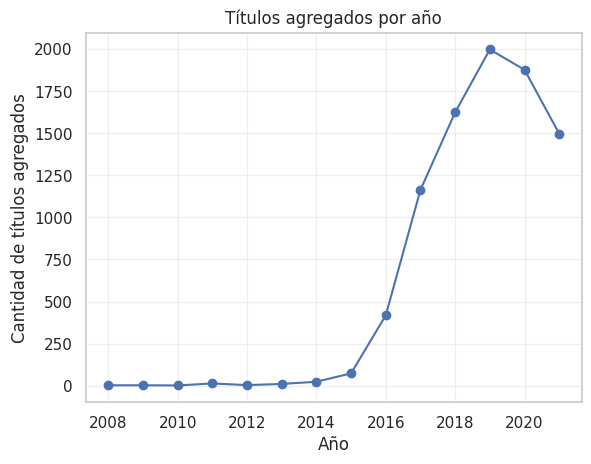

In [33]:
# FIXME
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Años y meses de 'date_added'
df["year_added"]  = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# Orden de meses para etiquetas
meses_num = list(range(1,13))
meses_lbl = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

titles_per_year = df.groupby("year_added")["show_id"].count().dropna()

plt.plot(titles_per_year.index, titles_per_year.values, marker="o")
plt.title("Títulos agregados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos agregados")
plt.grid(True, alpha=0.3)
plt.show()

Parece que entre 2018 y 2020 se tuvo la mayor cantidad de titulos agregados a la plataforma, podría tener relación con la expansión internacional pues se ve como en 2016 empieza a agregar cada vez mas titulos por año, siendo 2016 el año en donde se empezo a lanzar en la mayoría de paises alrededor del mundo.

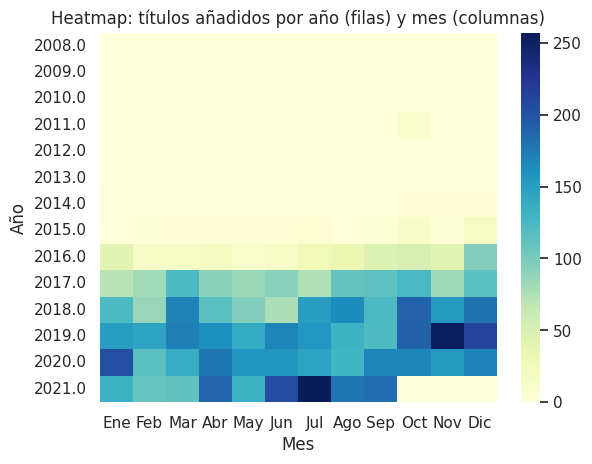

In [32]:
tmp = df.dropna(subset=["year_added", "month_added"]).copy()
tmp["month_added"] = tmp["month_added"].astype(int)

tabla = (tmp.groupby(["year_added","month_added"])["show_id"].count().unstack(fill_value=0).reindex(columns=meses_num))  # asegurar orden 1..12

import numpy as np
sns.heatmap(tabla, cmap="YlGnBu")
plt.title("Heatmap: títulos añadidos por año (filas) y mes (columnas)")
plt.xlabel("Mes")
plt.ylabel("Año")

plt.xticks(ticks=np.arange(0.5, 12.5, 1), labels=meses_lbl, rotation=0)
plt.yticks(rotation=0)

plt.show()


Claramente parece haber meses con mas estrenos que otros meses, sin embargo la estacionalidad parece ser bastante homogenea con respecto a los lanzamientos, lo mas cercano que se podría ver de está es que los meses con mayor numeros de lanzamientos (noviembre 2019 y julio 2021) suceden entre verano e invierno.

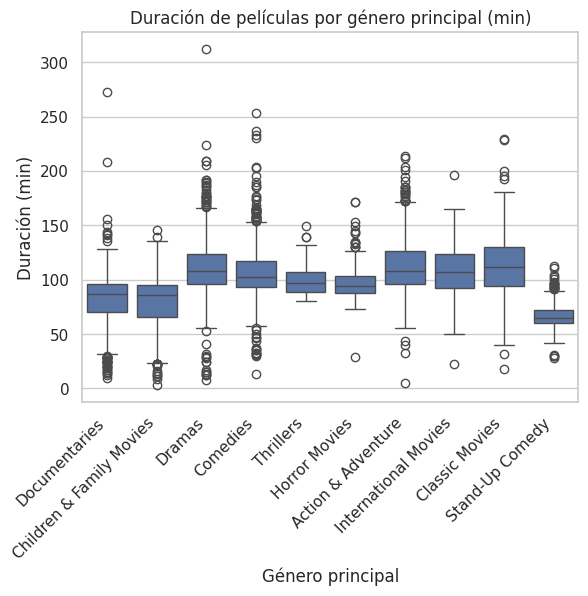

In [42]:
movies = df[df["type"]=="Movie"].copy()
movies["duration_min"] = (movies["duration"].str.extract(r"(\d+)\s*min", expand=False).astype(float))

movies["main_genre"] = movies["listed_in"].str.split(",").str[0].str.strip()

top_genres = (movies["main_genre"].value_counts().head(10).index)

plot_data = movies[movies["main_genre"].isin(top_genres)].dropna(subset=["duration_min"])

sns.boxplot(data=plot_data, x="main_genre", y="duration_min")
plt.title("Duración de películas por género principal (min)")
plt.xlabel("Género principal")
plt.ylabel("Duración (min)")
plt.xticks(rotation=45, ha="right")
plt.show()


El genero que tiene las peliculas con mayor duración es el de "peliculas clasicas" aunque las duraciones para este genero suelen variar bastante en comparación con la de los otros generos. Podemos notar que los generos con menor variación en su duración son los thrillers y peliculas de terror (curioso pero por alguna razon creo que tiene sentido XD)



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



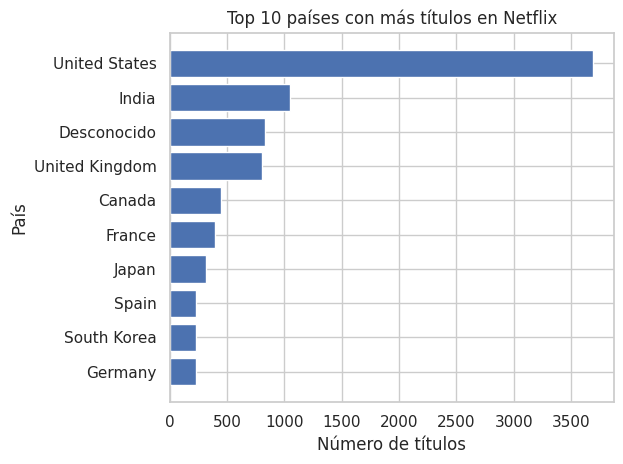

In [43]:
countries = (df.assign(country=df['country'].fillna('Desconocido'))
               .assign(country=lambda x: x['country'].str.split(','))
               .explode('country'))
countries['country'] = countries['country'].str.strip()

df['main_genre'] = df['listed_in'].fillna('Desconocido').str.split(',').str[0].str.strip()

movies = df[df['type']=='Movie'].copy()
movies['duration_min'] = (movies['duration']
                          .str.extract(r'(\d+)\s*min', expand=False)
                          .astype(float))
top10 = countries['country'].value_counts().head(10)

plt.barh(top10.index[::-1], top10.values[::-1])
plt.title("Top 10 países con más títulos en Netflix")
plt.xlabel("Número de títulos")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Era de esperarse la clara dominancia de estados unidos sobre los titulos, aunque menos esperado es india en segundo lugar, sin embargo tambien hace sentido despues de pensar que existe bollywood.

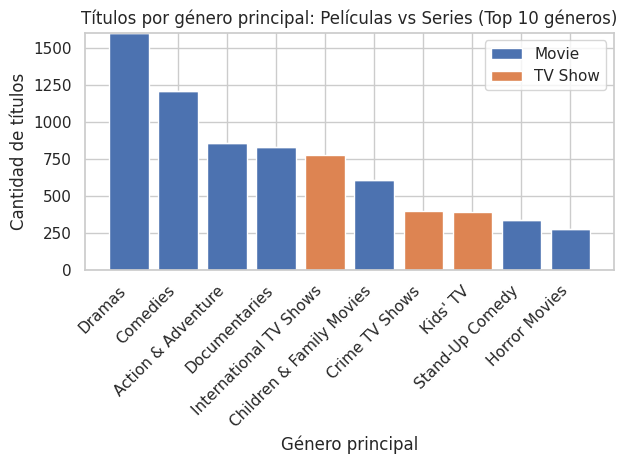

In [39]:
counts = (df.groupby(['main_genre','type'])['show_id'].count().unstack(fill_value=0))

top_genres = counts.sum(axis=1).sort_values(ascending=False).head(10).index #Los 10 generos mas frecuentes
counts_top = counts.loc[top_genres]

bottom = np.zeros(len(counts_top))
for t in ['Movie','TV Show']:
    if t in counts_top.columns:
        plt.bar(counts_top.index, counts_top[t].values, bottom=bottom, label=t)
        bottom += counts_top[t].values

plt.title("Títulos por género principal: Películas vs Series (Top 10 géneros)")
plt.xlabel("Género principal")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Por lo visto en el grafico los generos por lo general prefieren peliculas (lo cual tiene sentido recordando la diferencia entre cantidad de peliculas y series) sin embargo podemos notar que los generos dominantes en las series son shows internacionales, shows de crimenes y shows para niños.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME